In [7]:
from config import config
import numpy as np

val_label = np.load(config['test_label'])

In [3]:
val_label.shape

(500, 3570)

In [4]:
train_label = np.load(config['train_label'])
train_label.shape

(12000, 3570)

In [9]:
from PIL import Image
import os
image_path = os.path.join(config['train_pic_dir'], '1.bmp')
image = Image.open(image_path).convert('RGB')

In [12]:
print(image)

<PIL.Image.Image image mode=RGB size=165x165 at 0x2204D87E4F0>


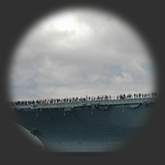

In [13]:
image

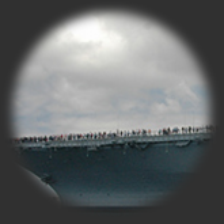

In [20]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224))
])
image_transform = transform(image)
image_transform

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

image_transform = transform(image)
# 绘制转换后的图片
import matplotlib.pyplot as plt
image_transform = image_transform.permute(1, 2, 0)
plt.imshow(image_transform.numpy())
plt.show()

In [17]:
print(image)

<PIL.Image.Image image mode=RGB size=165x165 at 0x2204D87E4F0>


# 观察测试集结果

首先计算测试集的相关系数

In [2]:
from config import config
from net.MyCNN import MyCNN
from utilis.data_loader import My_twoPhoton_Dataset
import os
import numpy as np
from torch.utils.data import DataLoader
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

te_image_list = os.listdir(config['test_pic_dir'])
te_image_path_list = [os.path.join(config['test_pic_dir'], x) for x in te_image_list]
te_label = np.load(config['test_label'])
test_dataset = My_twoPhoton_Dataset(te_image_path_list, te_label)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=True)

model = MyCNN(te_label.shape[1],
                k=config['k'],
                kernel_size=config['kernel_size'],
                stride=config['stride'],
                padding=config['padding'],
                bias=config['bias'],
                fc_hidden_units=config['fc_hidden_units'])

model.load_state_dict(torch.load(f"model/best_model.pth"))
model.eval()
model.to(device=device)

# 测试模型

for images, labels in test_loader:
    images = images.to(device=device, dtype=torch.float32)
    labels = labels.to(device=device, dtype=torch.float32)
    with torch.no_grad():
        outputs = model(images)


In [3]:
print(outputs.shape)
print(labels.shape)

torch.Size([500, 3570])
torch.Size([500, 3570])


In [4]:
print(outputs)

tensor([[0.6489, 0.6323, 0.5778,  ..., 0.0000, 0.0000, 0.0000],
        [0.7067, 0.6653, 0.6298,  ..., 0.0000, 0.0000, 0.0000],
        [0.7033, 0.6602, 0.6171,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.5902, 0.5699, 0.5298,  ..., 0.0000, 0.0000, 0.0000],
        [0.7816, 0.7302, 0.6938,  ..., 0.0000, 0.0000, 0.0000],
        [0.7516, 0.6999, 0.6767,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')


In [7]:
print(labels)
print(torch.max(labels))
print(torch.min(labels))

tensor([[ 0.4912,  0.5707,  0.6447,  ..., -0.1097, -0.1599, -0.1543],
        [ 0.6734,  0.6813,  0.7780,  ..., -0.0710, -0.0521, -0.0368],
        [ 0.9666,  0.9434,  1.0944,  ...,  0.3200,  0.2564,  0.5412],
        ...,
        [ 0.7338,  0.7114,  0.6929,  ...,  0.0568, -0.0980, -0.0273],
        [ 1.2842,  1.2715,  1.3114,  ...,  0.3665,  0.3453,  0.4099],
        [ 0.1312,  0.0697,  0.0292,  ..., -0.3488, -0.2423, -0.3584]],
       device='cuda:0')
tensor(6.9643, device='cuda:0')
tensor(-2.6853, device='cuda:0')


In [19]:
# 转换为numpy
outputs = outputs.cpu().numpy()
labels = labels.cpu().numpy()

In [20]:
# 计算outputs和labels每行之间的相关系数
from scipy.stats import pearsonr
correlation = []
for i in range(outputs.shape[0]):
    correlation.append(pearsonr(outputs[i], labels[i])[0])

In [22]:
print(correlation)

[0.6644112979446312, 0.47560124650982905, 0.5988915215652033, 0.5737531996017051, 0.5714282747125721, 0.6999650524000599, 0.6631599105169105, 0.5553794163194208, 0.42742858744032136, 0.5128307802260774, 0.6102667435495861, 0.5525291876077393, 0.29994215910100075, 0.5839979824063513, 0.6181704414269974, 0.42133335986889703, 0.651192785215485, 0.44124484872567216, 0.4669050300464932, 0.4616949508637369, 0.5216692632464717, 0.6074361492904314, 0.5351997296638169, 0.6757201296155194, 0.522536451229609, 0.4834532208974835, 0.6859706321299069, 0.5833192960018961, 0.6118404106381321, 0.6598344166612055, 0.5061715791536111, 0.6470380231826864, 0.6546371722613767, 0.7117939457625295, 0.6851653078037073, 0.5206421377067288, 0.6547452695194399, 0.5714593251883868, 0.614868079785916, 0.5331714935547545, 0.5818230513525426, 0.4093420113718543, 0.5905239145916399, 0.45762356262586984, 0.6231721050458595, 0.6633032195208902, 0.7311942601266225, 0.7396545751290999, 0.6932272975259215, 0.47439850982677

In [24]:
# 计算平均相关系数
mean_correlation = np.mean(correlation)
print(mean_correlation)

0.5723781655088749


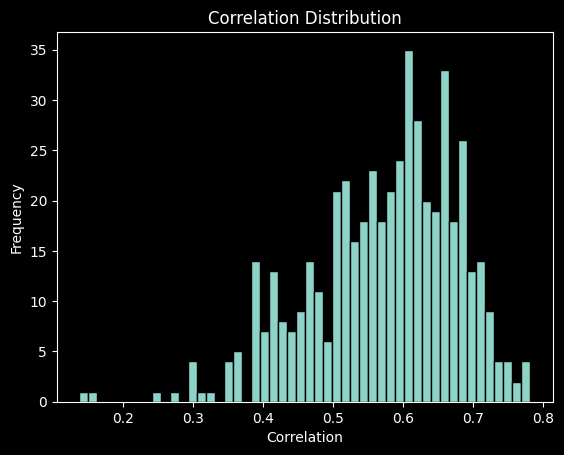

In [32]:
import matplotlib.pyplot as plt

plt.hist(correlation, bins=50, edgecolor='black')
plt.title('Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

# 观察图片有什么特点

297
0.1378334773133983


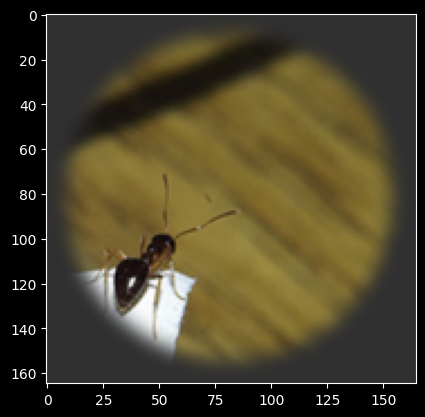

In [35]:
# 找到第几张图片的相关系数最小
min_index = np.argmin(correlation)
print(min_index)
print(correlation[min_index])
# 显示这张图片
from PIL import Image
image = Image.open(te_image_path_list[min_index]).convert('RGB')
plt.imshow(image)

376
0.7817614971308797


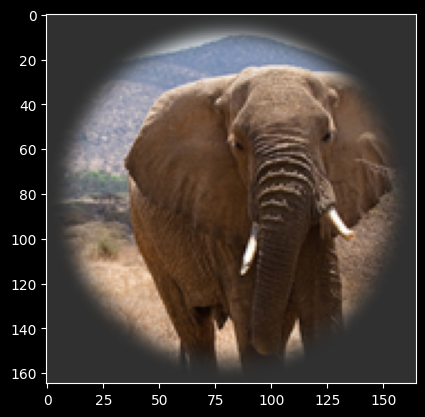

In [36]:
# 找到第几张图片的相关系数最大
max_index = np.argmax(correlation)
print(max_index)
print(correlation[max_index])
# 显示这张图片
image = Image.open(te_image_path_list[max_index]).convert('RGB')
plt.imshow(image)

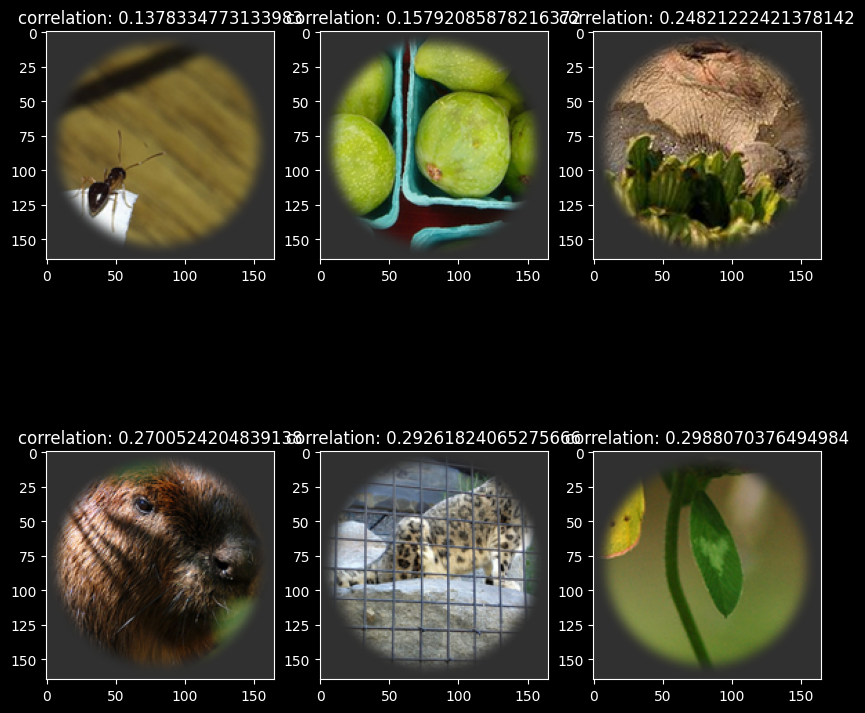

In [39]:
# 把相关系数最低的前六张图片显示出来，每行显示3张图片
plt.figure(figsize=(10, 10))
for i in range(6):
    image = Image.open(te_image_path_list[np.argsort(correlation)[i]]).convert('RGB')
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f'correlation: {np.sort(correlation)[i]}')

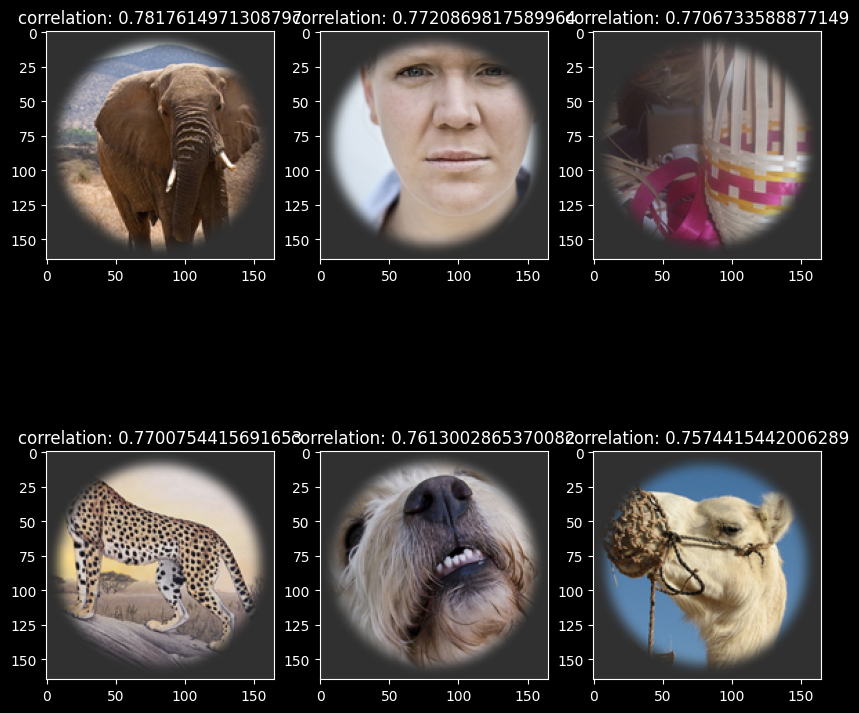

In [40]:
# 把相关系数最高的前六张图片显示出来，每行显示3张图片
plt.figure(figsize=(10, 10))
for i in range(6):
    image = Image.open(te_image_path_list[np.argsort(correlation)[-i-1]]).convert('RGB')
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f'correlation: {np.sort(correlation)[-i-1]}')

重建

In [1]:
from config import config
from net.MyCNN import DecoderCNN
from utilis.data_loader import My_twoPhoton_Dataset
import os
import numpy as np
from torch.utils.data import DataLoader
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

te_image_list = os.listdir(config['test_pic_dir'])
te_image_path_list = [os.path.join(config['test_pic_dir'], x) for x in te_image_list]
te_label = np.load(config['test_label'])
test_dataset = My_twoPhoton_Dataset(te_image_path_list, te_label)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=True)

decoder = DecoderCNN(te_label.shape[1],
                k=config['k'],
                kernel_size=config['kernel_size'],
                stride=config['stride'],
                padding=config['padding'],
                bias=config['bias'],
                fc_hidden_units=config['fc_hidden_units'])

decoder.load_state_dict(torch.load(f"model/best_Decoder_model.pth"))
decoder.eval()
decoder.to(device=device)

# 测试模型

for images, labels in test_loader:
    images = images.to(device=device, dtype=torch.float32)
    labels = labels.to(device=device, dtype=torch.float32)
    with torch.no_grad():
        outputs = decoder(labels)

outputs = outputs.cpu().numpy()
images = images.cpu().numpy()


In [4]:
outputs.shape
print(np.max(outputs))

0.10650865


In [3]:
images[1].shape
print(np.max(images))
#ssim(outputs[1], images[1], multichannel=True, channel_axis=0, data_range=1)

1.0


In [5]:
# 计算outputs与原始图片之间的相似度
from skimage.metrics import structural_similarity as ssim


similarity = []
for i in range(outputs.shape[0]):
    similarity.append(ssim(outputs[i], images[i], multichannel=True, channel_axis=0, data_range=1))


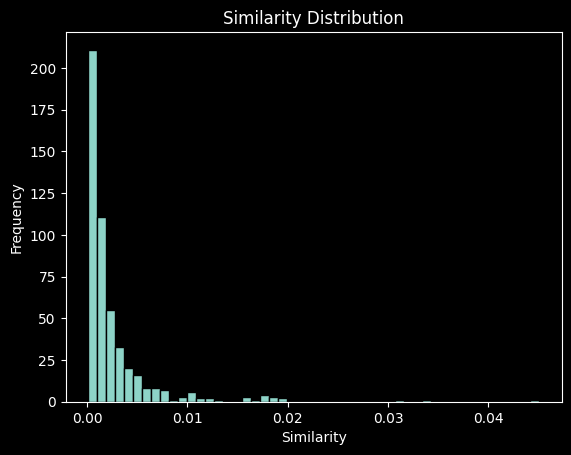

In [6]:
# 绘制相似度分布
import matplotlib.pyplot as plt
plt.hist(similarity, bins=50, edgecolor='black')
plt.title('Similarity Distribution')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

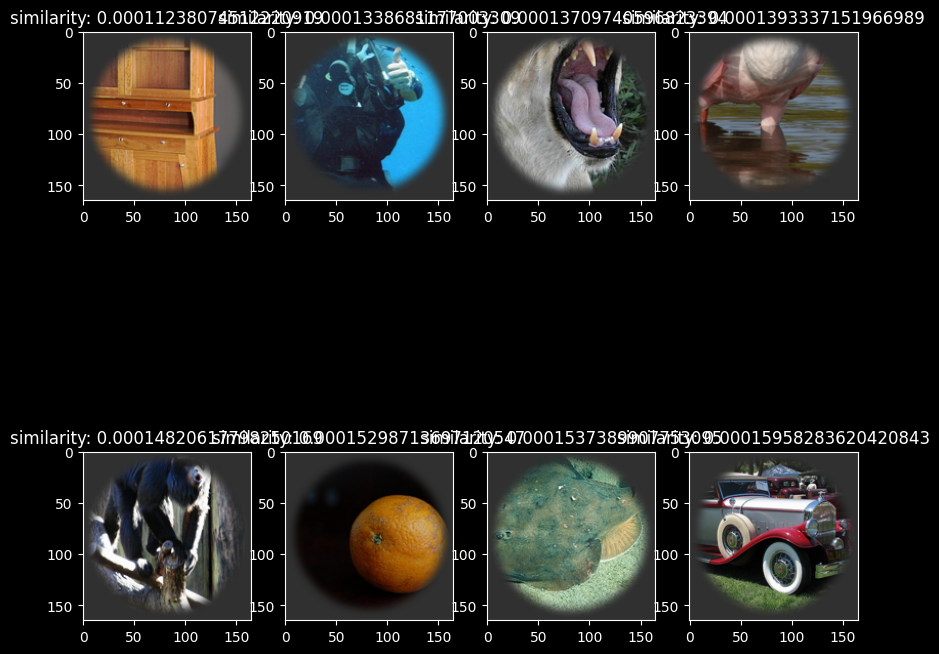

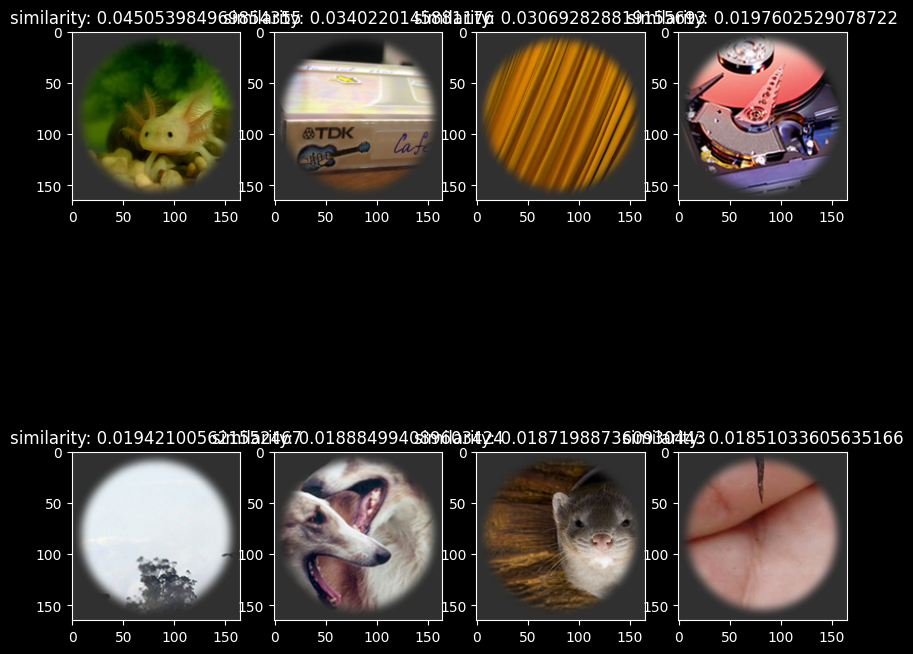

In [11]:
# 显示前八个最低相似度的图片
plt.figure(figsize=(10, 10))
for i in range(8):
    img = Image.open(te_image_path_list[np.argsort(similarity)[i]]).convert('RGB')
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(f'similarity: {np.sort(similarity)[i]}')

# 显示前八个最高相似度的图片
plt.figure(figsize=(10, 10))
for i in range(8):
    img = Image.open(te_image_path_list[np.argsort(similarity)[-i-1]]).convert('RGB')
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(f'similarity: {np.sort(similarity)[-i-1]}')

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(config['transform_resize']),
    transforms.ToTensor(),
    transforms.Normalize(mean=config['transform_mean'], std=config['transform_std'])
])

# 将output的numpy矩阵按照transform的方式转换回图片
output_image = []
for i in range(outputs.shape[0]):
    output_image.append(transform(outputs[i]))
    
